In [1]:
from data_functions import *

In [174]:
PAMP = pd.read_csv('./Data/Argentina - Pampa Energia SA (PAMP).csv')
PAMP

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021",85.15,86.5,88.1,85.15,564.30K,-1.10%
1,"Mar 30, 2021",86.1,85.15,86.75,84.6,141.40K,1.29%
2,"Mar 29, 2021",85,80,86,79,371.22K,3.85%
3,"Mar 26, 2021",81.85,84,84.6,80.7,462.55K,-2.09%
4,"Mar 25, 2021",83.6,85.2,87.3,82.1,389.78K,-3.13%
...,...,...,...,...,...,...,...
296,"Jan 07, 2020",47.6,48.35,49,46.9,901.95K,-1.86%
297,"Jan 06, 2020",48.5,48.4,48.7,47,719.24K,-0.61%
298,"Jan 03, 2020",48.8,48.25,49.45,46.5,595.36K,1.14%
299,"Jan 02, 2020",48.25,49.35,50.2,47.55,878.50K,-2.92%


In [4]:
PAMP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      301 non-null    object
 1   Price     301 non-null    object
 2   Open      301 non-null    object
 3   High      301 non-null    object
 4   Low       301 non-null    object
 5   Vol.      300 non-null    object
 6   Change %  300 non-null    object
dtypes: object(7)
memory usage: 16.6+ KB


In [5]:
## drop last row because it doesn't contain relevant information

PAMP.drop(300, inplace=True)

In [6]:
## change date column to datetime

PAMP['Date'] = pd.to_datetime(PAMP['Date'], format='%b %d, %Y')

In [7]:
## change price columns to integer

PAMP['Price'] = pd.to_numeric(PAMP['Price'])
PAMP['Open'] = pd.to_numeric(PAMP['Open'])
PAMP['High'] = pd.to_numeric(PAMP['High'])
PAMP['Low'] = pd.to_numeric(PAMP['Low'])

In [8]:
PAMP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      300 non-null    datetime64[ns]
 1   Price     300 non-null    float64       
 2   Open      300 non-null    float64       
 3   High      300 non-null    float64       
 4   Low       300 non-null    float64       
 5   Vol.      300 non-null    object        
 6   Change %  300 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 18.8+ KB


In [9]:
PAMP.sort_values(['Date'], ascending=True, ignore_index=True, inplace=True)
PAMP

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,48.25,49.35,50.20,47.55,878.50K,-2.92%
1,2020-01-03,48.80,48.25,49.45,46.50,595.36K,1.14%
2,2020-01-06,48.50,48.40,48.70,47.00,719.24K,-0.61%
3,2020-01-07,47.60,48.35,49.00,46.90,901.95K,-1.86%
4,2020-01-08,46.50,47.50,47.50,46.00,1.18M,-2.31%
...,...,...,...,...,...,...,...
295,2021-03-25,83.60,85.20,87.30,82.10,389.78K,-3.13%
296,2021-03-26,81.85,84.00,84.60,80.70,462.55K,-2.09%
297,2021-03-29,85.00,80.00,86.00,79.00,371.22K,3.85%
298,2021-03-30,86.10,85.15,86.75,84.60,141.40K,1.29%


In [169]:
## find rows for 2021 data

PAMP.loc[PAMP['Date'] > '2020-12-31']

,Date,Price,Open,High,Low,Vol.,Change %
240,2021-01-04,76.70,76.90,78.10,76.00,463.28K,-0.26%
241,2021-01-05,78.30,76.65,78.90,76.20,500.06K,2.09%
242,2021-01-06,78.00,77.60,78.90,77.00,175.53K,-0.38%
243,2021-01-07,79.95,76.60,80.40,76.60,414.26K,2.50%
244,2021-01-08,79.00,79.45,79.90,76.30,836.37K,-1.19%
245,2021-01-11,75.50,76.70,77.20,73.80,251.45K,-4.43%
246,2021-01-12,76.00,74.55,78.00,73.20,436.60K,0.66%
247,2021-01-13,77.50,76.05,78.00,75.50,253.17K,1.97%
248,2021-01-14,77.00,78.00,78.50,75.80,741.08K,-0.65%
249,2021-01-15,78.10,77.10,78.10,75.40,353.31K,1.43%


In [11]:
## split training data and testing data, testing data will be the year of 2021

training_data = PAMP[['Date', 'Price']][:240]
testing_data = PAMP[['Date', 'Price']][240:]

In [12]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(PAMP[['Price']])
scaled_train_data = scaled_data[:240]

## PyTorch

## Daily

In [135]:
X_train, y_train = get_train_data(scaled_train_data, 14)
X_test, y_test = get_test_data(PAMP, testing_data, scaler, 14)

In [136]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [137]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [138]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.20559975504875183
Epoch  1 MSE:  0.11050527542829514
Epoch  2 MSE:  0.05532877519726753
Epoch  3 MSE:  0.15722501277923584
Epoch  4 MSE:  0.055252689868211746
Epoch  5 MSE:  0.05835753679275513
Epoch  6 MSE:  0.07180821895599365
Epoch  7 MSE:  0.07892492413520813
Epoch  8 MSE:  0.07946448028087616
Epoch  9 MSE:  0.07518552243709564
Epoch  10 MSE:  0.06763884425163269
Epoch  11 MSE:  0.058094434440135956
Epoch  12 MSE:  0.048111170530319214
Epoch  13 MSE:  0.040898799896240234
Epoch  14 MSE:  0.04315950348973274
Epoch  15 MSE:  0.05033421143889427
Epoch  16 MSE:  0.03991304710507393
Epoch  17 MSE:  0.029274463653564453
Epoch  18 MSE:  0.025744138285517693
Epoch  19 MSE:  0.024438807740807533
Epoch  20 MSE:  0.020000161603093147
Epoch  21 MSE:  0.010548009537160397
Epoch  22 MSE:  0.019533326849341393
Epoch  23 MSE:  0.015534242615103722
Epoch  24 MSE:  0.011267629452049732
Epoch  25 MSE:  0.014144684188067913
Epoch  26 MSE:  0.012622596696019173
Epoch  27 MSE:  0.008198

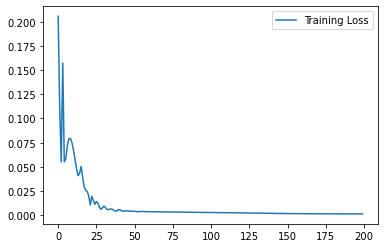

In [139]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [140]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.08 RMSE
Test Score: 2.04 RMSE


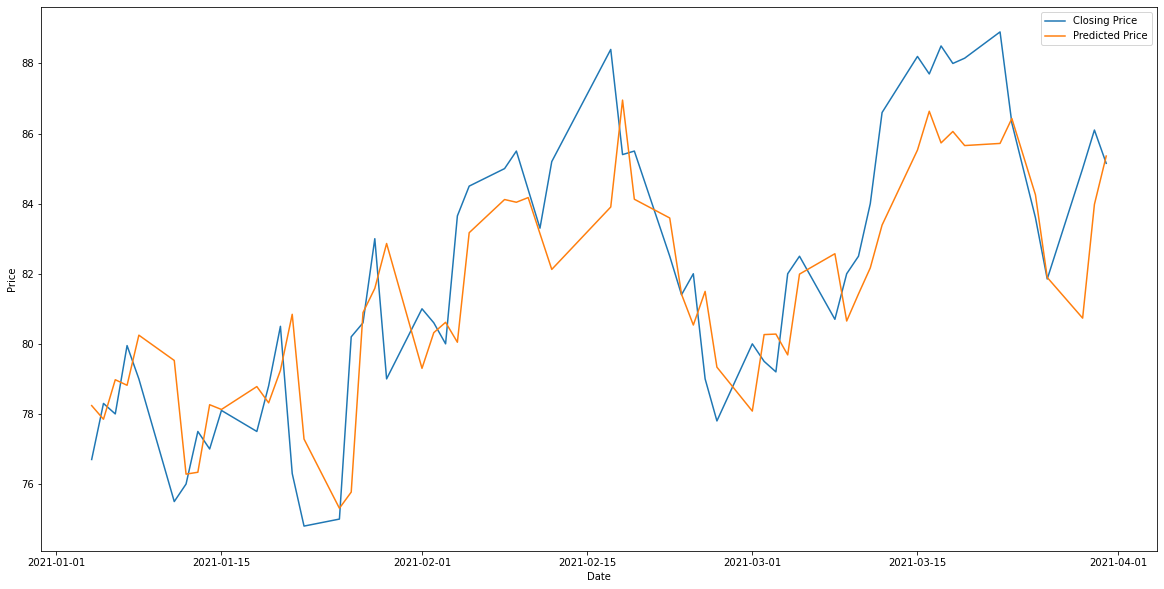

In [141]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test, label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [166]:
boll_daily = PAMP[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_daily['Price'] = price
boll_daily['SMA'] = sma(boll_daily['Price'], 9)
boll_daily['upper_bb'], boll_daily['lower_bb'] = bollinger(boll_daily['Price'], boll_daily['SMA'], 9)
boll_daily

C:\Users\Chris\AppData\Local\Temp/ipykernel_13232/1781672656.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_13232/1781672656.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['SMA'] = sma(boll_daily['Price'], 9)
C:\Users\Chris\AppData\Local\Temp/ipykernel_13232/1781672656.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,48.250000,NaN,NaN,NaN
1,2020-01-03,48.800000,NaN,NaN,NaN
2,2020-01-06,48.500000,NaN,NaN,NaN
3,2020-01-07,47.600000,NaN,NaN,NaN
4,2020-01-08,46.500000,NaN,NaN,NaN
...,...,...,...,...,...
295,2021-03-25,84.253113,85.489283,87.563799,83.414768
296,2021-03-26,81.894279,85.323271,88.227534,82.419008
297,2021-03-29,80.733742,84.790471,88.993809,80.587134
298,2021-03-30,83.979469,84.495258,88.482866,80.507650


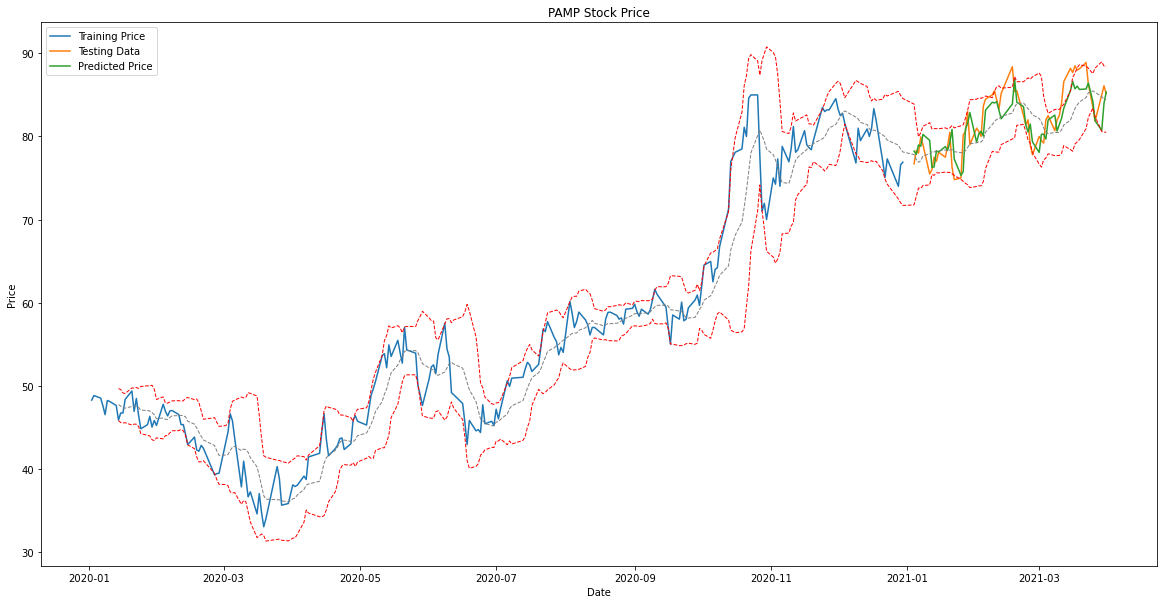

In [167]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'], boll_daily['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

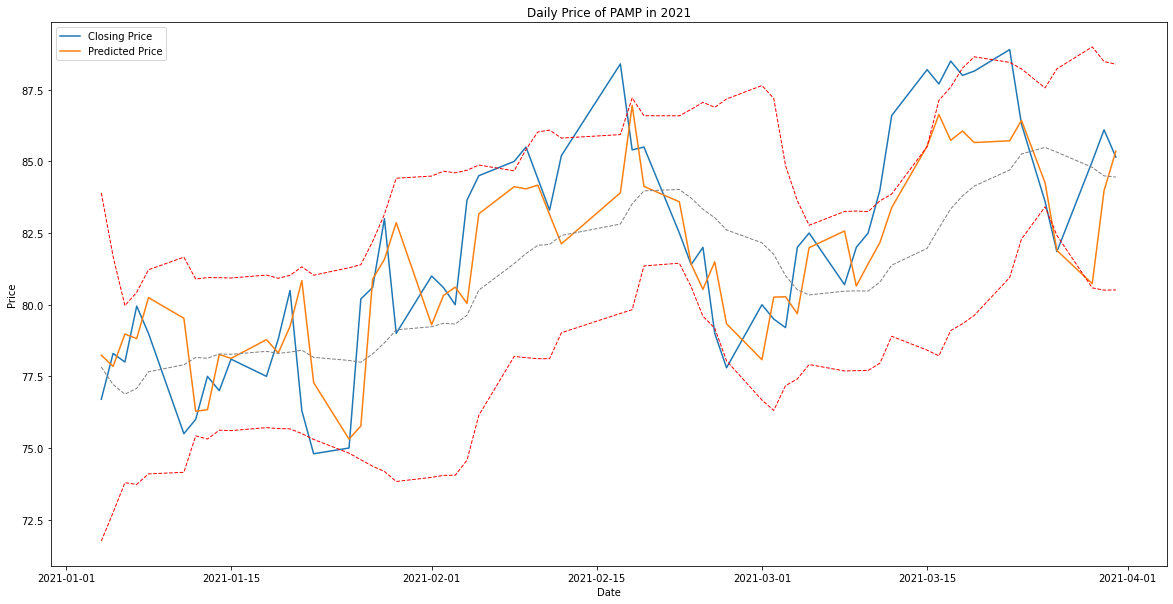

In [168]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'][240:], boll_daily['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][240:], boll_daily['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][240:], boll_daily['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price Prediction of PAMP in 2021')
plt.legend()
plt.show()

## Weekly

In [90]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=5, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=5, bias=True)
)


In [97]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 15)
X_test_w, y_test_w = get_weekly_test_data(PAMP, testing_data, scaler, 15)

In [98]:
X_train_w = torch.from_numpy(X_train_w).type(torch.Tensor)
X_test_w = torch.from_numpy(X_test_w).type(torch.Tensor)
y_train_w = torch.from_numpy(y_train_w).type(torch.Tensor)
y_test_w = torch.from_numpy(y_test_w).type(torch.Tensor)

In [99]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_w)    
    
    loss = criterion(y_train_pred, y_train_w)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.0045753298327326775
Epoch  1 MSE:  0.005865301005542278
Epoch  2 MSE:  0.006935653276741505
Epoch  3 MSE:  0.008695597760379314
Epoch  4 MSE:  0.006456977222114801
Epoch  5 MSE:  0.00625888304784894
Epoch  6 MSE:  0.007512870244681835
Epoch  7 MSE:  0.00647452799603343
Epoch  8 MSE:  0.005902980919927359
Epoch  9 MSE:  0.0055512432008981705
Epoch  10 MSE:  0.005162587855011225
Epoch  11 MSE:  0.005084107629954815
Epoch  12 MSE:  0.005039472132921219
Epoch  13 MSE:  0.004942589905112982
Epoch  14 MSE:  0.0045653157867491245
Epoch  15 MSE:  0.004475233610719442
Epoch  16 MSE:  0.004653347656130791
Epoch  17 MSE:  0.004572384059429169
Epoch  18 MSE:  0.004277587868273258
Epoch  19 MSE:  0.004149230662733316
Epoch  20 MSE:  0.0041154297068715096
Epoch  21 MSE:  0.0039664944633841515
Epoch  22 MSE:  0.003957204055041075
Epoch  23 MSE:  0.004047896713018417
Epoch  24 MSE:  0.003958570770919323
Epoch  25 MSE:  0.0038462874945253134
Epoch  26 MSE:  0.0038789694663137197
Epoch 

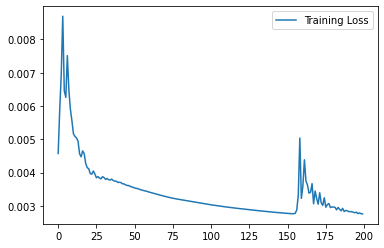

In [100]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [101]:
y_train_pred = model(X_train_w)
y_test_pred = model(X_test_w)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_w.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_w.reshape(12, 5).detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_w[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_w[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 57.28 RMSE
Test Score: 78.33 RMSE


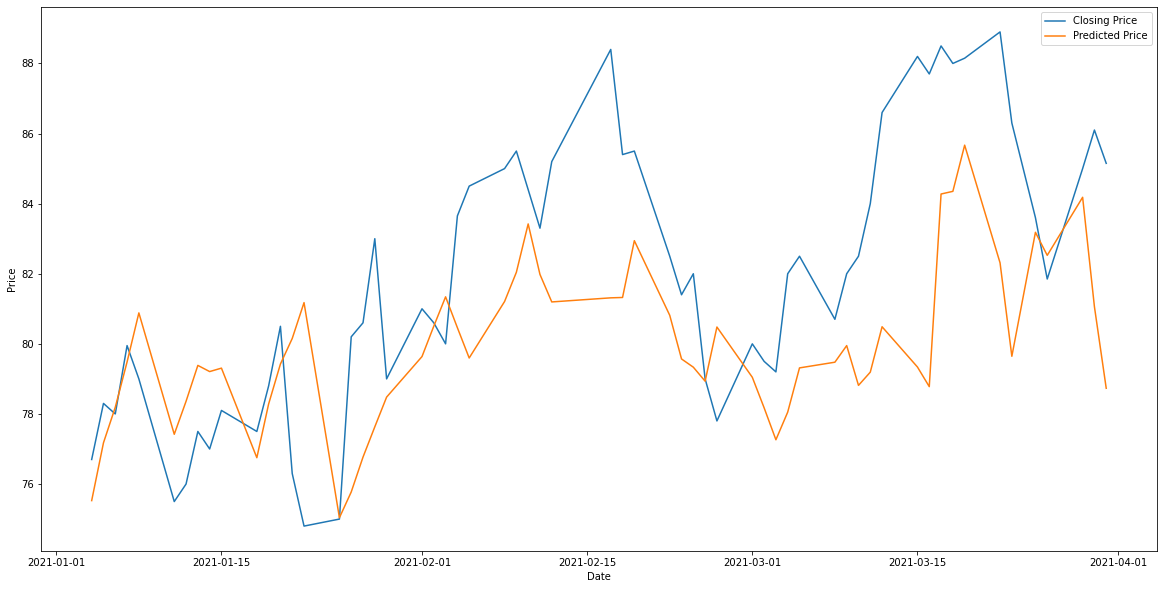

In [102]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [112]:
boll_weekly = PAMP[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_weekly['Price'] = price
boll_weekly['SMA'] = sma(boll_weekly['Price'], 10)
boll_weekly['upper_bb'], boll_weekly['lower_bb'] = bollinger(boll_weekly['Price'], boll_weekly['SMA'], 10)
boll_weekly

C:\Users\Chris\AppData\Local\Temp/ipykernel_13232/1752366587.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_13232/1752366587.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['SMA'] = sma(boll_weekly['Price'], 10)
C:\Users\Chris\AppData\Local\Temp/ipykernel_13232/1752366587.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,48.250000,NaN,NaN,NaN
1,2020-01-03,48.800000,NaN,NaN,NaN
2,2020-01-06,48.500000,NaN,NaN,NaN
3,2020-01-07,47.600000,NaN,NaN,NaN
4,2020-01-08,46.500000,NaN,NaN,NaN
...,...,...,...,...,...
295,2021-03-25,83.182472,81.722950,86.803084,76.642816
296,2021-03-26,82.524643,82.056202,86.826225,77.286179
297,2021-03-29,84.181587,82.425639,87.227733,77.623544
298,2021-03-30,81.059418,82.597771,87.016046,78.179496


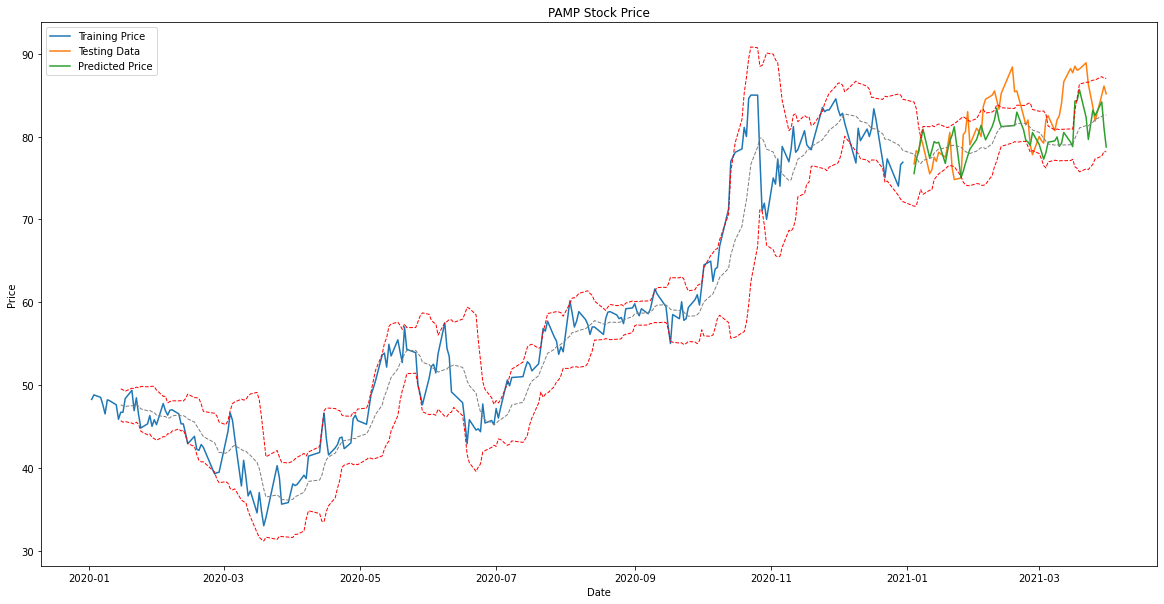

In [113]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'], boll_weekly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

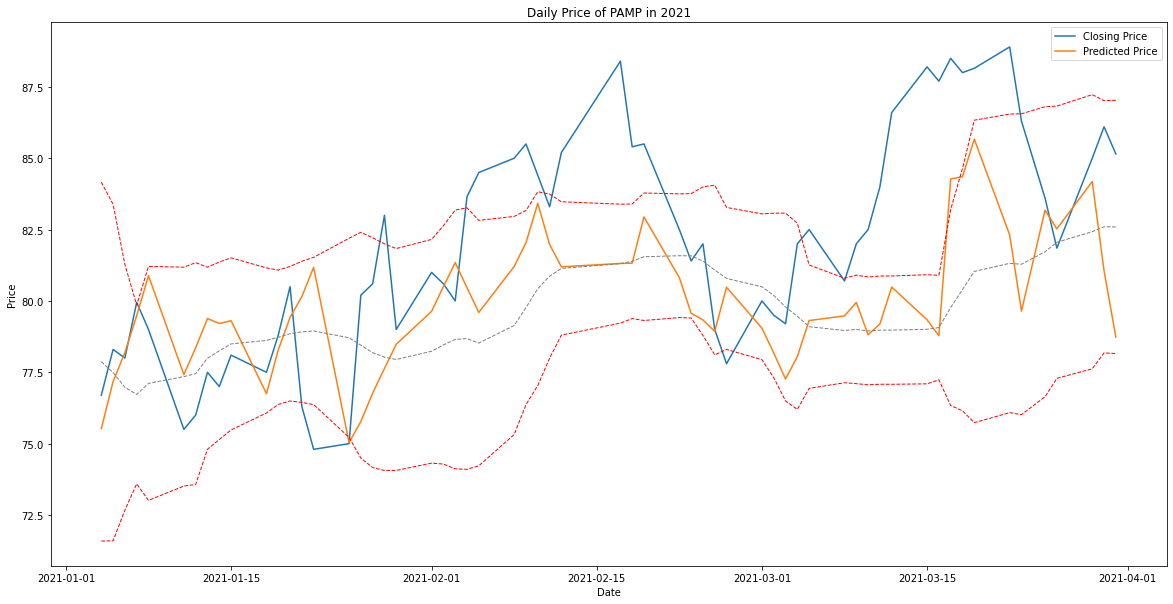

In [114]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'][240:], boll_weekly['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][240:], boll_weekly['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][240:], boll_weekly['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price Prediction of PAMP in 2021')
plt.legend()
plt.show()

# Monthly

In [115]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=20, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=20, bias=True)
)


In [116]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data, 40)
X_test_m, y_test_m = get_monthly_test_data(PAMP, testing_data, scaler, 40)

In [117]:
X_train_m = torch.from_numpy(X_train_m).type(torch.Tensor)
X_test_m = torch.from_numpy(X_test_m).type(torch.Tensor)
y_train_m = torch.from_numpy(y_train_m).type(torch.Tensor)
y_test_m = torch.from_numpy(y_test_m).type(torch.Tensor)

In [118]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_m)    
    
    loss = criterion(y_train_pred, y_train_m)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.2840074598789215
Epoch  1 MSE:  0.2281964272260666
Epoch  2 MSE:  0.15892183780670166
Epoch  3 MSE:  0.06791866570711136
Epoch  4 MSE:  0.1823350489139557
Epoch  5 MSE:  0.06554488092660904
Epoch  6 MSE:  0.0659855380654335
Epoch  7 MSE:  0.08458885550498962
Epoch  8 MSE:  0.08572115004062653
Epoch  9 MSE:  0.07759124040603638
Epoch  10 MSE:  0.0682697519659996
Epoch  11 MSE:  0.06230529397726059
Epoch  12 MSE:  0.06082052364945412
Epoch  13 MSE:  0.0622422881424427
Epoch  14 MSE:  0.06380466371774673
Epoch  15 MSE:  0.06347879767417908
Epoch  16 MSE:  0.061236534267663956
Epoch  17 MSE:  0.05839749798178673
Epoch  18 MSE:  0.056163474917411804
Epoch  19 MSE:  0.05487852543592453
Epoch  20 MSE:  0.05412214621901512
Epoch  21 MSE:  0.05312630161643028
Epoch  22 MSE:  0.051111139357089996
Epoch  23 MSE:  0.0474264919757843
Epoch  24 MSE:  0.041652221232652664
Epoch  25 MSE:  0.03435351699590683
Epoch  26 MSE:  0.02844448760151863
Epoch  27 MSE:  0.022407224401831627
Epoc

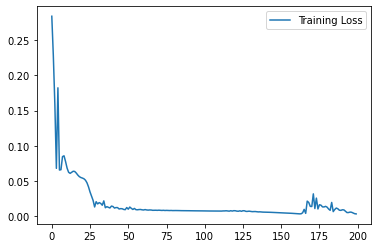

In [119]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [120]:
y_train_pred = model(X_train_m)
y_test_pred = model(X_test_m)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_m.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_m.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_m[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_m[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 57.75 RMSE
Test Score: 80.30 RMSE


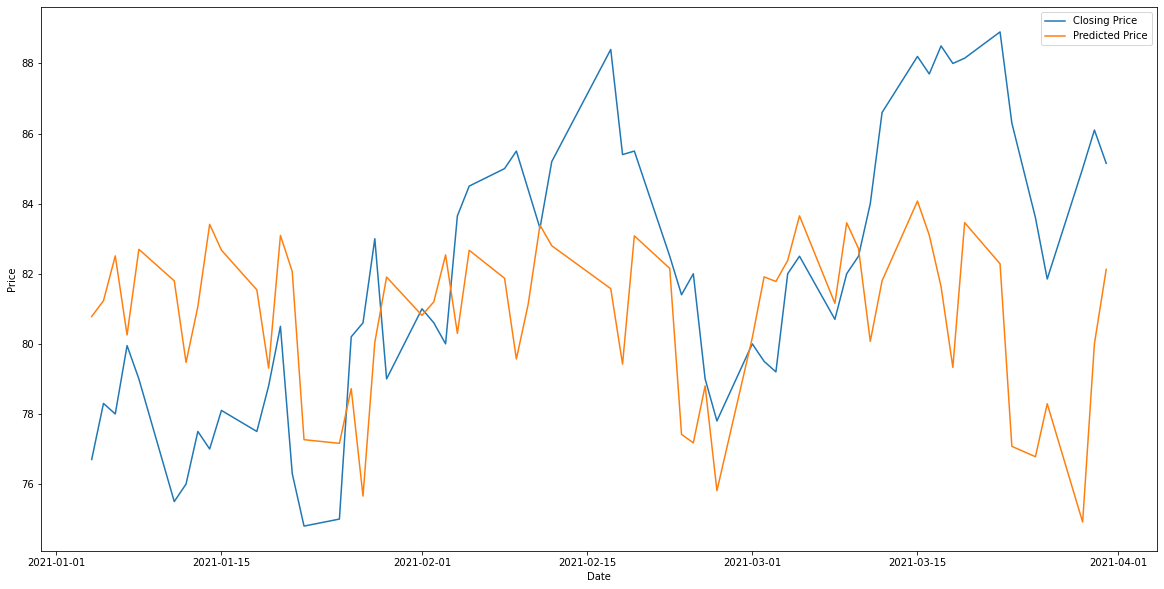

In [121]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [122]:
boll_monthly = PAMP[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_monthly['Price'] = price
boll_monthly['SMA'] = sma(boll_monthly['Price'], 10)
boll_monthly['upper_bb'], boll_monthly['lower_bb'] = bollinger(boll_monthly['Price'], boll_monthly['SMA'], 10)
boll_monthly

C:\Users\Chris\AppData\Local\Temp/ipykernel_13232/2987780832.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_13232/2987780832.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['SMA'] = sma(boll_monthly['Price'], 10)
C:\Users\Chris\AppData\Local\Temp/ipykernel_13232/2987780832.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,48.250000,NaN,NaN,NaN
1,2020-01-03,48.800000,NaN,NaN,NaN
2,2020-01-06,48.500000,NaN,NaN,NaN
3,2020-01-07,47.600000,NaN,NaN,NaN
4,2020-01-08,46.500000,NaN,NaN,NaN
...,...,...,...,...,...
295,2021-03-25,76.779663,80.960017,86.100505,75.819530
296,2021-03-26,78.290634,80.781937,86.176349,75.387526
297,2021-03-29,74.916199,80.093654,86.560985,73.626323
298,2021-03-30,80.002319,79.686584,85.522307,73.850860


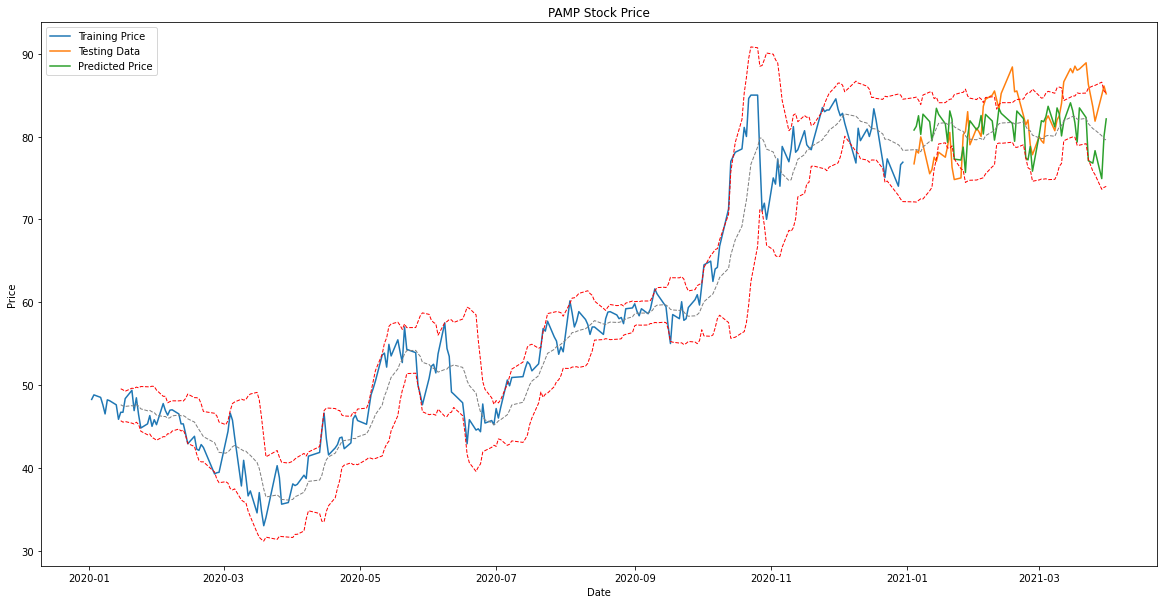

In [123]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'], boll_monthly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

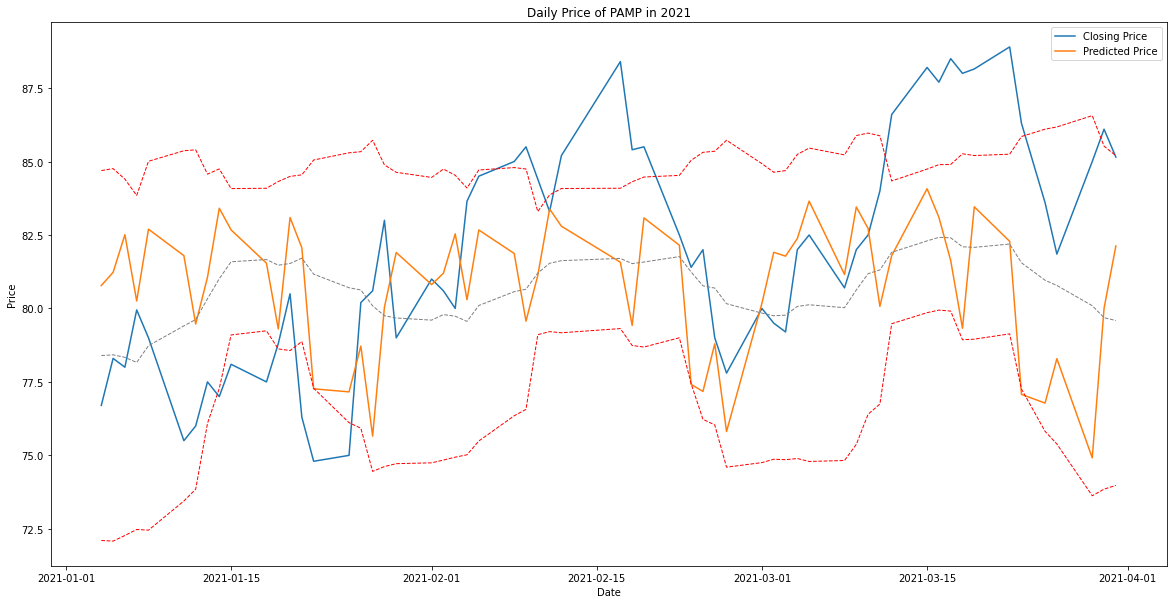

In [124]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'][240:], boll_monthly['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][240:], boll_monthly['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][240:], boll_monthly['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly Price Prediction of PAMP in 2021')
plt.legend()
plt.show()

# Appendix

# TensorFlow

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

## Daily

In [13]:
X_train, y_train = get_train_data(scaled_train_data, 10)
X_test, y_test = get_test_data(PAMP, testing_data, scaler, 10)

In [17]:
inputs = tf.keras.Input(shape=(X_train.shape[1], 1))
x = layers.LSTM(units=50, return_sequences=True)(inputs)
x = layers.Dropout(0.2)(x)
x = layers.LSTM(units=50)(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable p

In [18]:
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(lr=.01, decay=0.01))

history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200


C:\Users\Chris\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 3s 9ms/step - loss: 0.1112
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0379
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0176
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0064
Epoch 8/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 9/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0054
Epoch 10/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 11/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0073
Epoch 12/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 13/200
8/8 [==============================] - 0s 8ms/step - loss: 0

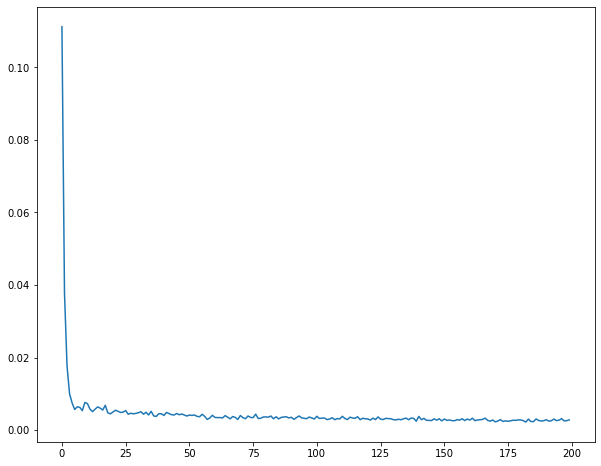

In [19]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='training loss')

In [22]:
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
testing_data['Predicted_Price'] = pred_price

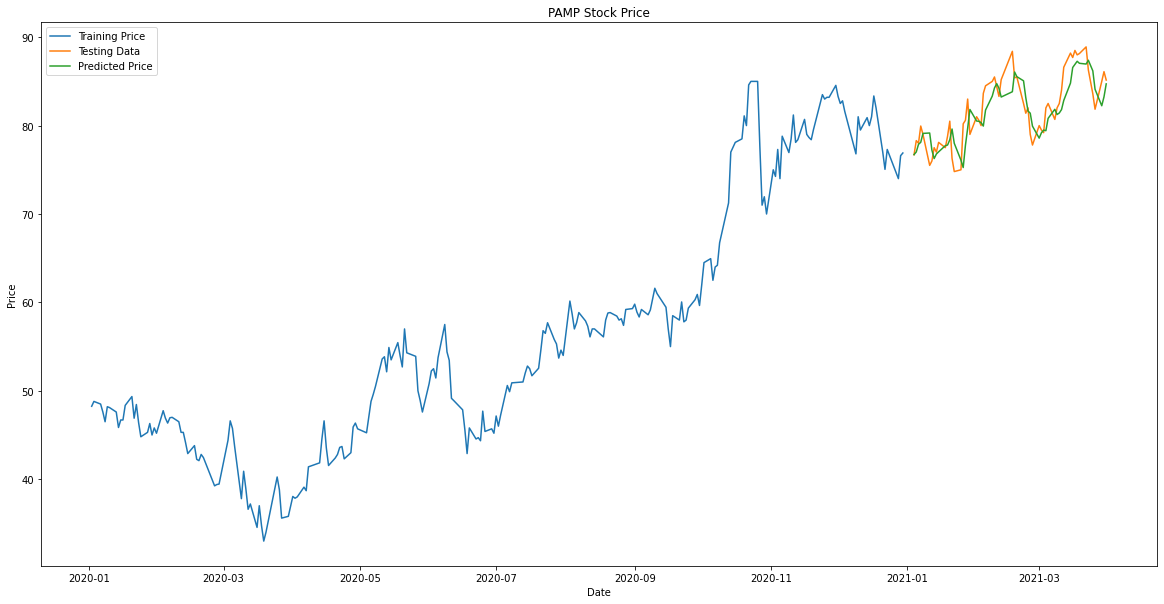

In [23]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], testing_data['Predicted_Price'], label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

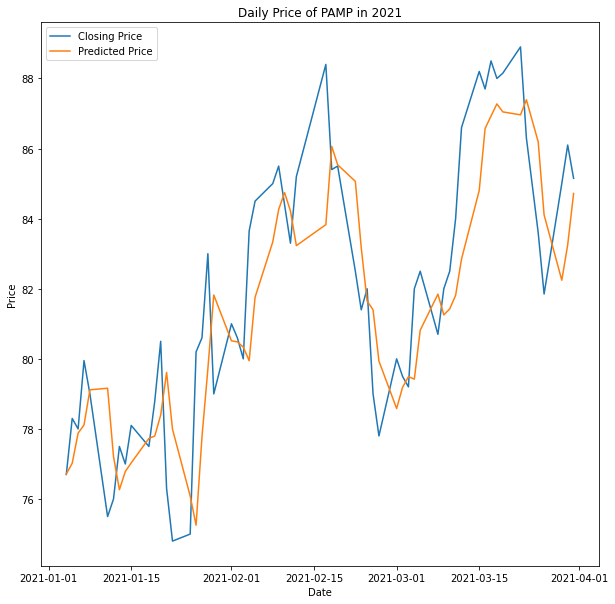

In [24]:
plt.figure(figsize=(10, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], testing_data['Predicted_Price'], label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price of PAMP in 2021')
plt.legend()
plt.show()

In [36]:
boll_df = PAMP[['Date']]
boll_df['Price'] = training_data['Price']
boll_df['Price'][240:] = testing_data['Predicted_Price']

C:\Users\Chris\AppData\Local\Temp/ipykernel_11604/570996053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_df['Price'] = training_data['Price']
C:\Users\Chris\AppData\Local\Temp/ipykernel_11604/570996053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_df['Price'][240:] = testing_data['Predicted_Price']
C:\Users\Chris\anaconda3\lib\site-packages\pandas\core\series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [40]:
boll_df['SMA'] = sma(boll_df['Price'], 20)
boll_df['upper_bb'], boll_df['lower_bb'] = bollinger(boll_df['Price'], boll_df['SMA'], 20)
boll_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_11604/4042872622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_df['SMA'] = sma(boll_df['Price'], 20)
C:\Users\Chris\AppData\Local\Temp/ipykernel_11604/4042872622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_df['upper_bb'], boll_df['lower_bb'] = bollinger(boll_df['Price'], boll_df['SMA'], 20)


,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,48.250000,NaN,NaN,NaN
1,2020-01-03,48.800000,NaN,NaN,NaN
2,2020-01-06,48.500000,NaN,NaN,NaN
3,2020-01-07,47.600000,NaN,NaN,NaN
4,2020-01-08,46.500000,NaN,NaN,NaN
...,...,...,...,...,...
295,2021-03-25,86.193428,83.059274,89.472542,76.646006
296,2021-03-26,84.105873,83.194484,89.574545,76.814423
297,2021-03-29,82.243782,83.309915,89.523038,77.096792
298,2021-03-30,83.249397,83.543279,89.345752,77.740805


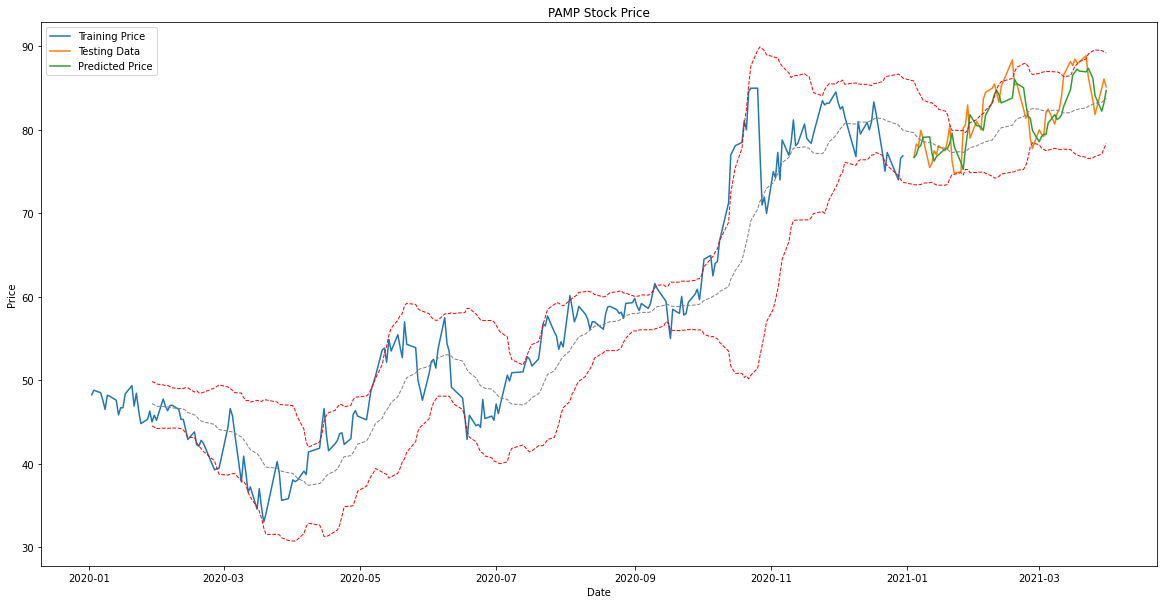

In [41]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], testing_data['Predicted_Price'], label='Predicted Price')
plt.plot(boll_df['Date'], boll_df['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_df['Date'], boll_df['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_df['Date'], boll_df['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

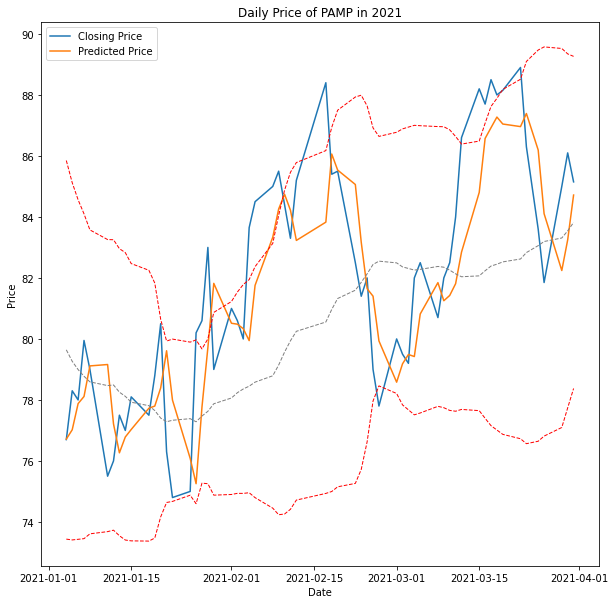

In [42]:
plt.figure(figsize=(10, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], testing_data['Predicted_Price'], label='Predicted Price')
plt.plot(boll_df['Date'][240:], boll_df['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_df['Date'][240:], boll_df['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_df['Date'][240:], boll_df['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price of PAMP in 2021')
plt.legend()
plt.show()

## Weekly

In [44]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 10)
X_test_w, y_test_w = get_weekly_test_data(PAMP, testing_data, scaler, 10)

In [45]:
inputs = tf.keras.Input(shape=(X_train_w.shape[1], 1))
x = layers.LSTM(units=50, return_sequences=True)(inputs)
x = layers.Dropout(0.2)(x)
x = layers.LSTM(units=50)(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(5, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 50)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 255       
                                                                 
Total params: 30,855
Trainable params: 30,855
Non-trainable

In [46]:
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(lr=.01, decay=0.01))

history = model.fit(X_train_w, y_train_w, epochs=200)

Epoch 1/200


C:\Users\Chris\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 3s 10ms/step - loss: 0.2183
Epoch 2/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0324
Epoch 3/200
2/2 [==============================] - 0s 11ms/step - loss: 0.0312
Epoch 4/200
2/2 [==============================] - 0s 11ms/step - loss: 0.0341
Epoch 5/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0325
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 7/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0194
Epoch 8/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 9/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0163
Epoch 10/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0108
Epoch 11/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 12/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 13/200
2/2 [==============================] - 0s 9ms/step - 

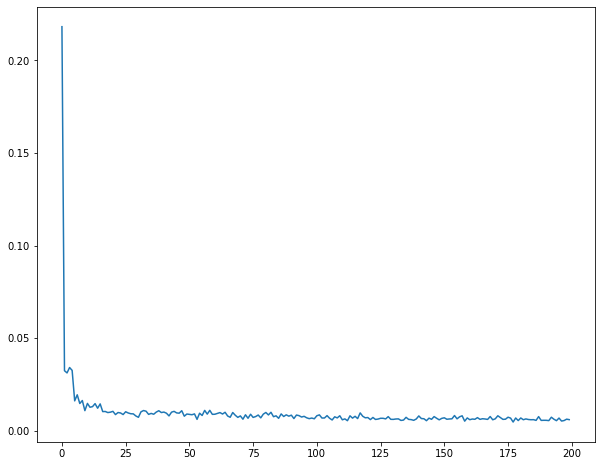

In [47]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='training loss')

In [50]:
pred_price = model.predict(X_test_w)
pred_price = scaler.inverse_transform(pred_price)

train_pred_price = model.predict(X_train_w)
train_pred_price = scaler.inverse_transform(train_pred_price)

In [51]:
trainScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_train_w[:,:]), train_pred_price))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test_w[:,:]), pred_price))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 3.85 RMSE
Test Score: 2.89 RMSE


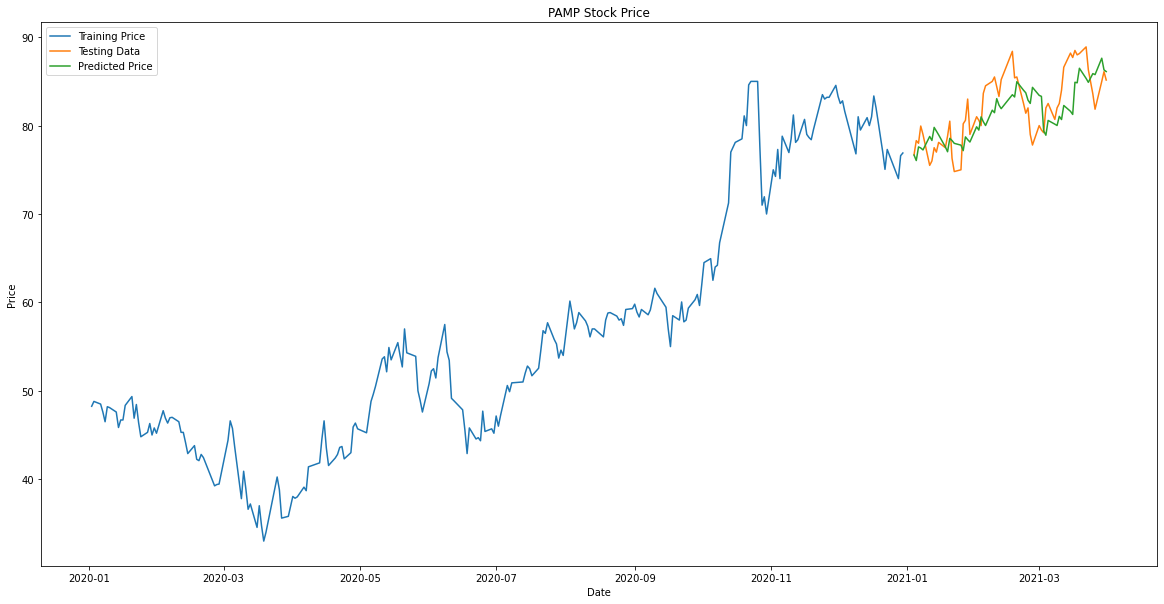

In [52]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], pred_price.flatten(), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

# Monthly

In [84]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data, 40)
X_test_m, y_test_m = get_monthly_test_data(PAMP, testing_data, scaler, 40)

In [99]:
inputs = tf.keras.Input(shape=(X_train_m.shape[1], 1))
x = layers.LSTM(units=50, return_sequences=True)(inputs)
x = layers.Dropout(0.2)(x)
x = layers.LSTM(units=50)(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(20, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 40, 1)]           0         
                                                                 
 lstm_14 (LSTM)              (None, 40, 50)            10400     
                                                                 
 dropout_14 (Dropout)        (None, 40, 50)            0         
                                                                 
 lstm_15 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_15 (Dropout)        (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                1020      
                                                                 
Total params: 31,620
Trainable params: 31,620
Non-trainable

In [100]:
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(lr=.01, decay=0.01))

history = model.fit(X_train_m, y_train_m, epochs=200)

Epoch 1/200


C:\Users\Chris\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 3s 3s/step - loss: 0.2559
Epoch 2/200
1/1 [==============================] - 0s 29ms/step - loss: 0.1669
Epoch 3/200
1/1 [==============================] - 0s 27ms/step - loss: 0.1080
Epoch 4/200
1/1 [==============================] - 0s 21ms/step - loss: 0.0457
Epoch 5/200
1/1 [==============================] - 0s 22ms/step - loss: 0.0534
Epoch 6/200
1/1 [==============================] - 0s 21ms/step - loss: 0.0414
Epoch 7/200
1/1 [==============================] - 0s 22ms/step - loss: 0.0487
Epoch 8/200
1/1 [==============================] - 0s 21ms/step - loss: 0.0406
Epoch 9/200
1/1 [==============================] - 0s 22ms/step - loss: 0.0373
Epoch 10/200
1/1 [==============================] - 0s 21ms/step - loss: 0.0290
Epoch 11/200
1/1 [==============================] - 0s 22ms/step - loss: 0.0267
Epoch 12/200
1/1 [==============================] - 0s 23ms/step - loss: 0.0254
Epoch 13/200
1/1 [==============================] - 0s 21ms/ste

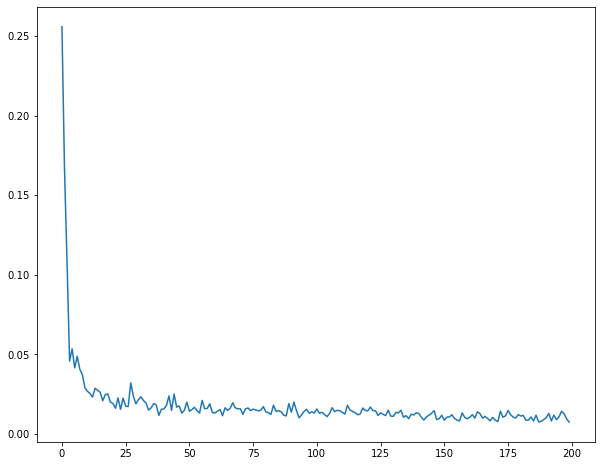

In [101]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='training loss')

In [103]:
pred_price = model.predict(X_test_m)
pred_price = scaler.inverse_transform(pred_price)

train_pred_price = model.predict(X_train_m, )
train_pred_price = scaler.inverse_transform(train_pred_price)

In [104]:
trainScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_train_m[:,:]), train_pred_price))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test_m[:,:]), pred_price))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4.29 RMSE
Test Score: 4.47 RMSE


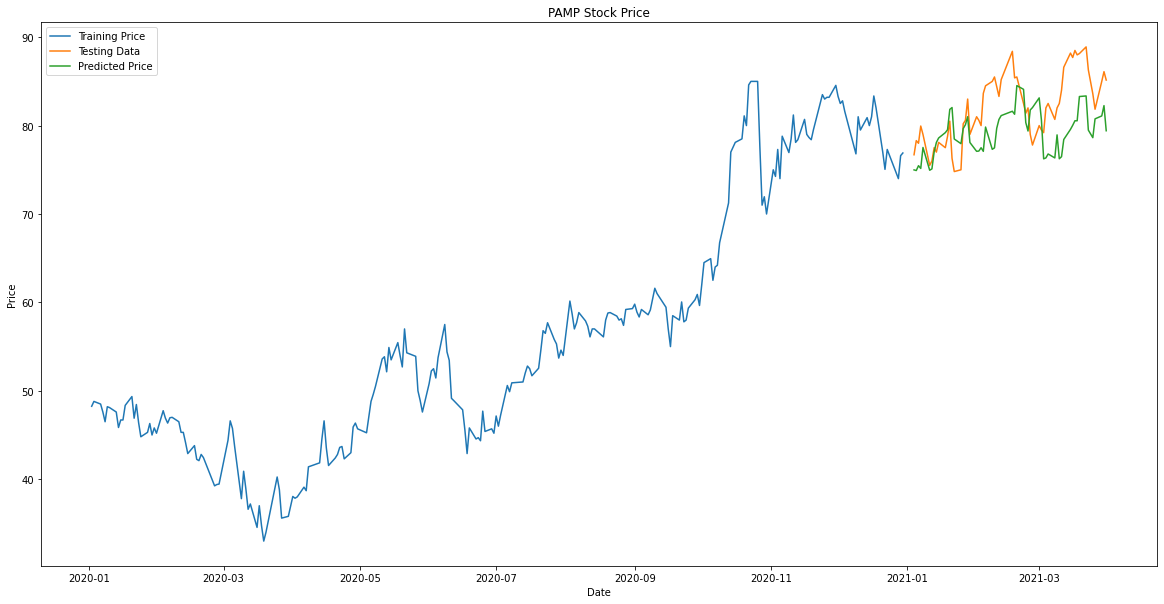

In [105]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], pred_price.flatten(), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()